Installing appropriate libraries to visualize the unemployment rate data along wiht subsequent variables. 
The dataframe names macro includes date, unrate, cpi, fedfunds, indpro, t10y2y. 


In [8]:
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

macro = pd.read_csv("../data/processed/macro_monthly_clean.csv", parse_dates=["date"])
macro.head()

,date,unrate,cpi,fedfunds,indpro,t10y2y
0,1976-06-01,7.6,56.7,5.48,43.9637,0.8013636363636363
1,1976-07-01,7.8,57.0,5.31,44.2141,0.981904761904762
2,1976-08-01,7.8,57.3,5.29,44.5182,1.1372727272727272
3,1976-09-01,7.6,57.6,5.25,44.6721,1.178095238095238
4,1976-10-01,7.7,57.9,5.02,44.6585,1.427


In [4]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      595 non-null    datetime64[ns]
 1   unrate    595 non-null    float64       
 2   cpi       595 non-null    float64       
 3   fedfunds  595 non-null    float64       
 4   indpro    595 non-null    float64       
 5   t10y2y    595 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 28.0 KB


In [5]:
macro.describe()

,date,unrate,cpi,fedfunds,indpro,t10y2y
count,595,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2001-03-01 19:26:31.260504192,6.060083,178.444963,4.658101,80.125232,0.849881
min,1976-06-01 00:00:00,3.400000,56.700000,0.050000,43.963700,-2.135714
25%,1988-10-16 12:00:00,4.700000,120.100000,1.185000,61.188450,0.187560
50%,2001-03-01 00:00:00,5.700000,176.100000,4.730000,89.168600,0.785217
75%,2013-07-16 12:00:00,7.200000,233.196500,6.560000,99.065150,1.468250
max,2025-12-01 00:00:00,14.800000,326.030000,19.100000,104.100400,2.834211
std,NaN,1.760666,68.907348,3.928673,20.084766,0.914920


KeyError: "None of ['date'] are in the columns"

<Axes: title={'center': 'Unemployment Rate'}>

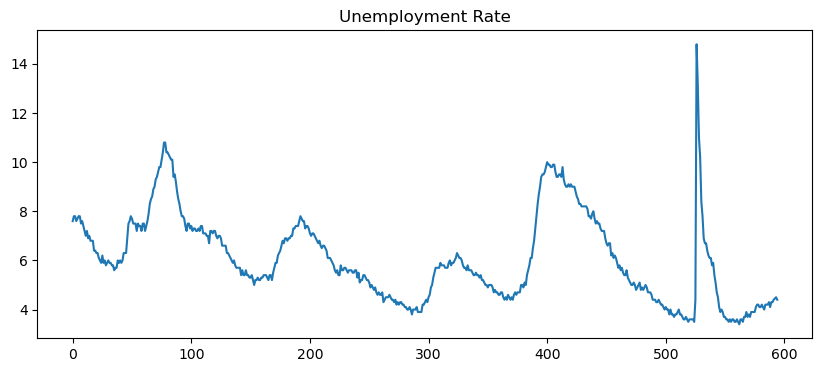

In [15]:
macro["unrate"].plot(figsize=(10,4), title= "Unemployment Rate")

In [20]:
adf_result = adfuller(macro["unrate"].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -2.9063910461136864
p-value: 0.044609837411509284


In [22]:
level_test = adfuller(macro["unrate"].dropna())
diff_test = adfuller(macro["unrate"].diff().dropna())

print("LEVEL p-value:", level_test[1])
print("DIFF p-value:", diff_test[1])

LEVEL p-value: 0.044609837411509284
DIFF p-value: 5.542891641787235e-26


<Axes: title={'center': 'UNRATE (Level)'}>

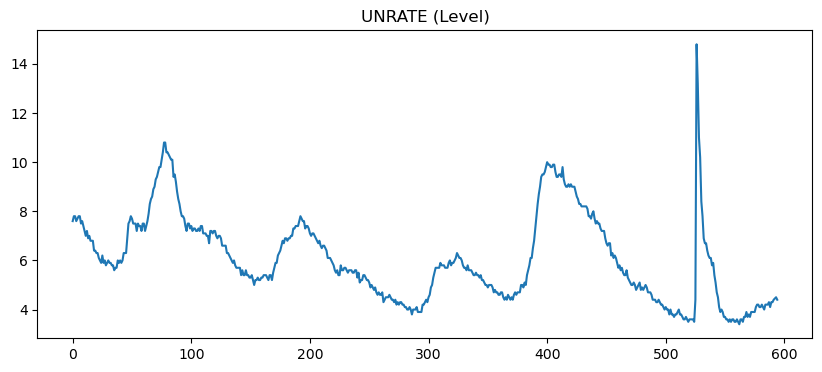

In [23]:
macro["unrate"].plot(title="UNRATE (Level)", figsize=(10,4))

<Axes: title={'center': 'Δ UNRATE'}>

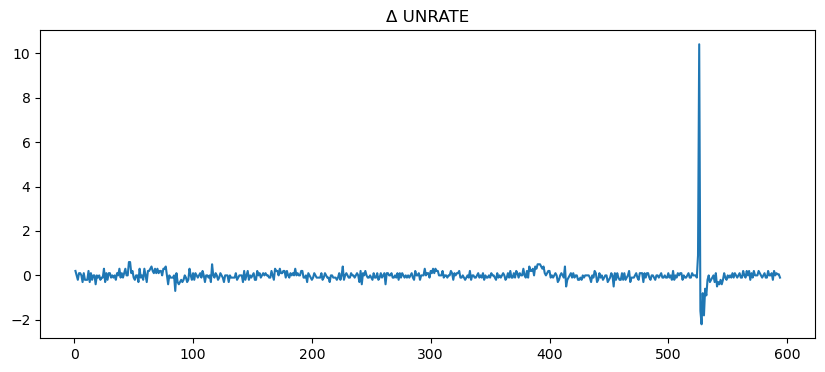

In [24]:
macro["unrate"].diff().plot(title="Δ UNRATE", figsize=(10,4))

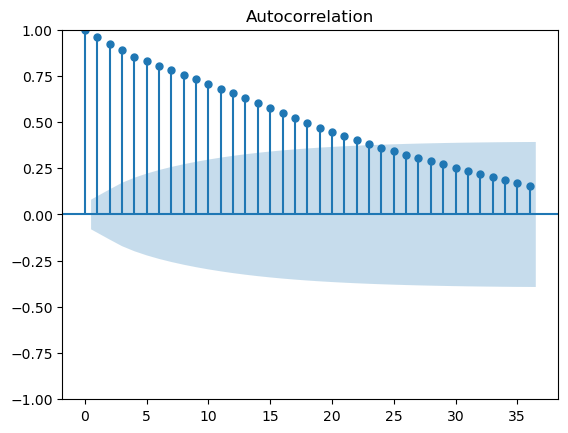

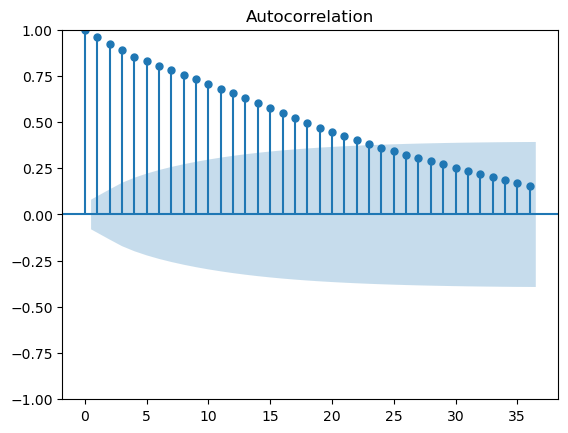

In [25]:
plot_acf(macro["unrate"].dropna(), lags=36)

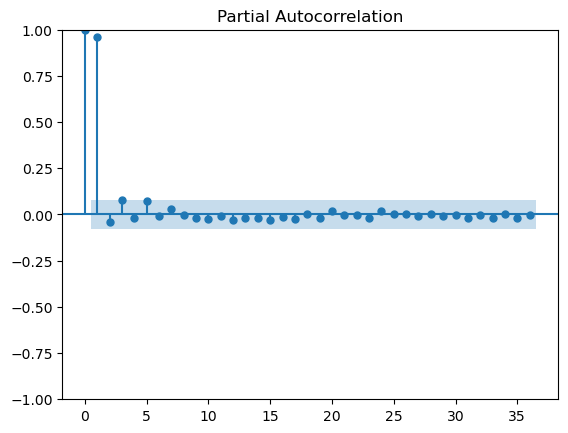

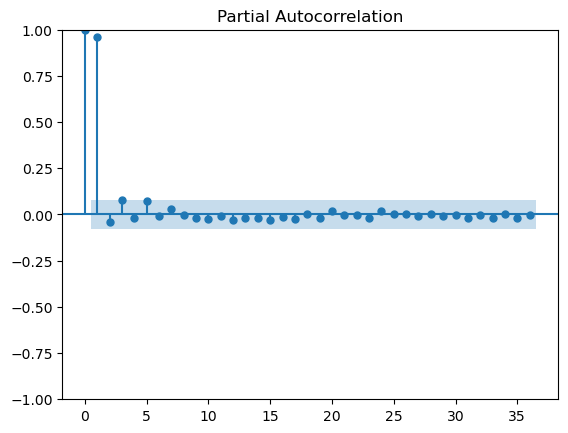

In [26]:
plot_pacf(macro["unrate"].dropna(), lags=36)

# Exploratory Data Analyis: UNRATE

## Visual Inspection
UNRATE fluctuates around a long-run mean rather than a persistent trend. Large spikes are visible during recessions periods -- the Covid pandemic and the Financial Crisis of 2007-2008 being the last two such periods. 

## Stationarity Test
An ADF test yields a p-value of less than 0.05. Hence, we can reject the unit root null at the 5% level. UNRATE is stationary, though persistent. 

## Autocorrelation Diagnostics
The ACF gradually decays and the PACF cuts off at lag=1. This is consistent with an AR(1) process. 

In [1]:
macro.head()

NameError: name 'macro' is not defined

In [9]:
macro = macro.sort_values("date").set_index("date")


print("min/max:", macro.index.min(), macro.index.max())
print("duplicates:", macro.index.duplicated().sum())
print("monotonic:", macro.index.is_monotonic_increasing)

expected = pd.date_range(macro.index.min(), macro.index.max(), freq="MS")
print("missing months:", len(expected.difference(macro.index)))

print("freq guess:", pd.infer_freq(macro.index))

min/max: 1976-06-01 00:00:00 2025-12-01 00:00:00
duplicates: 0
monotonic: True
missing months: 0
freq guess: MS
